In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [111]:
df = pd.read_csv("test_scores.csv")
df = df.drop(["student_id", "school", "classroom"], axis=1) 
df

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,Urban,Public,Standard,30.0,Female,Does not qualify,39.0,55.0
2129,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch,46.0,53.0


In [112]:
df.describe() # average number of students in class is 22.8 

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [101]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
print(x) # Independent Variables(What we are using to predict test scores)

     school_setting school_type teaching_method  n_student  gender  \
0             Urban  Non-public        Standard       20.0  Female   
1             Urban  Non-public        Standard       20.0  Female   
2             Urban  Non-public        Standard       20.0    Male   
3             Urban  Non-public        Standard       20.0  Female   
4             Urban  Non-public        Standard       20.0    Male   
...             ...         ...             ...        ...     ...   
2128          Urban      Public        Standard       30.0  Female   
2129          Urban      Public        Standard       30.0  Female   
2130          Urban      Public        Standard       30.0  Female   
2131          Urban      Public        Standard       30.0    Male   
2132          Urban      Public        Standard       30.0    Male   

                                 lunch  pretest  
0                     Does not qualify     62.0  
1                     Does not qualify     66.0  
2        

In [33]:
print(y) # Dependent Variable, (Actual Score)

0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
2128    55.0
2129    46.0
2130    51.0
2131    53.0
2132    48.0
Name: posttest, Length: 2133, dtype: float64


<AxesSubplot:xlabel='count', ylabel='school_setting'>

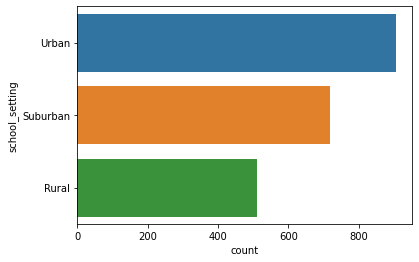

In [34]:
sns.countplot(y= df.school_setting) # Majority schools Urban

<AxesSubplot:xlabel='count', ylabel='school_type'>

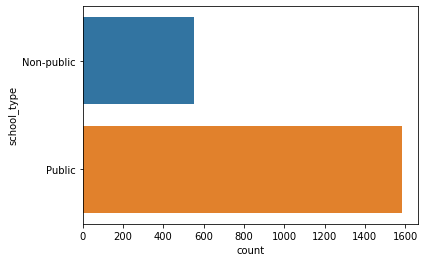

In [13]:
sns.countplot(y= df.school_type) # Majority schools Public

<AxesSubplot:xlabel='count', ylabel='teaching_method'>

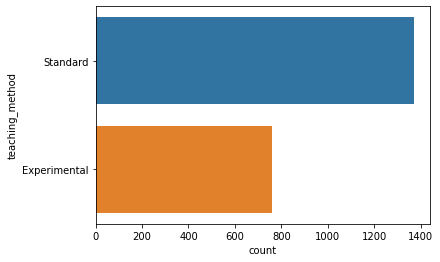

In [14]:
sns.countplot(y= df.teaching_method) # Majority standard teaching method

<AxesSubplot:xlabel='count', ylabel='gender'>

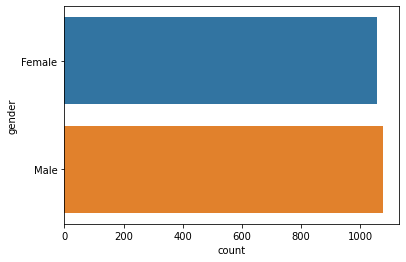

In [15]:
sns.countplot(y= df.gender) # Male and female split mostly evenly

<AxesSubplot:xlabel='count', ylabel='lunch'>

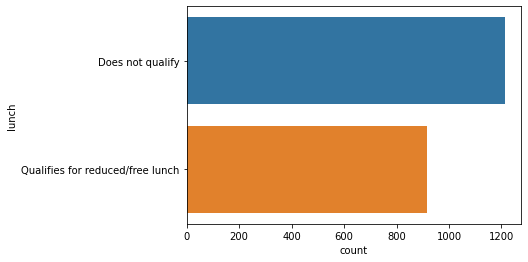

In [16]:
sns.countplot(y= df.lunch) # Most students don't qualify for cheaper/ free lunch

In [77]:
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), make_column_selector(dtype_include="object"))], remainder='passthrough')
X = np.array(ct.fit_transform(x)) 
X # Encode categorical variables into dummies

array([[ 0.,  0.,  1., ...,  0., 20., 62.],
       [ 0.,  0.,  1., ...,  0., 20., 66.],
       [ 0.,  0.,  1., ...,  0., 20., 64.],
       ...,
       [ 0.,  0.,  1., ...,  1., 30., 45.],
       [ 0.,  0.,  1., ...,  1., 30., 46.],
       [ 0.,  0.,  1., ...,  1., 30., 41.]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # split data test into training set and test set.

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
reshaped_y_pred = y_pred.reshape(len(y_pred), 1)
reshaped_y_test = y_test.values.reshape(len(y_test), 1)
print(np.concatenate((reshaped_y_pred, reshaped_y_test), 1))
# regressor.coef_ @ X[] + regressor.intercept_

# On the left is predicted score according to model, on the right is actual score.

[[67.68 68.  ]
 [57.66 62.  ]
 [79.65 79.  ]
 [59.31 66.  ]
 [68.81 68.  ]
 [57.98 66.  ]
 [74.94 78.  ]
 [44.81 47.  ]
 [42.1  45.  ]
 [80.23 83.  ]
 [92.36 96.  ]
 [50.09 55.  ]
 [60.9  59.  ]
 [62.13 62.  ]
 [84.09 83.  ]
 [76.   70.  ]
 [53.23 50.  ]
 [45.16 47.  ]
 [51.41 52.  ]
 [73.82 77.  ]
 [59.07 60.  ]
 [55.65 55.  ]
 [93.93 93.  ]
 [79.52 82.  ]
 [68.75 71.  ]
 [65.5  72.  ]
 [63.04 64.  ]
 [50.56 56.  ]
 [76.1  74.  ]
 [68.99 64.  ]
 [50.59 50.  ]
 [50.59 49.  ]
 [68.55 68.  ]
 [45.24 48.  ]
 [87.82 90.  ]
 [54.64 47.  ]
 [73.71 73.  ]
 [61.1  58.  ]
 [49.2  50.  ]
 [92.28 97.  ]
 [67.64 74.  ]
 [56.16 61.  ]
 [77.06 80.  ]
 [88.15 94.  ]
 [73.93 76.  ]
 [67.78 66.  ]
 [77.7  75.  ]
 [87.78 89.  ]
 [93.82 93.  ]
 [69.91 74.  ]
 [59.94 57.  ]
 [51.42 45.  ]
 [69.78 66.  ]
 [85.24 83.  ]
 [67.86 68.  ]
 [48.19 48.  ]
 [62.11 63.  ]
 [68.15 67.  ]
 [71.6  71.  ]
 [60.21 58.  ]
 [81.28 79.  ]
 [69.86 75.  ]
 [80.55 80.  ]
 [66.97 66.  ]
 [73.13 76.  ]
 [56.75 54.  ]
 [76.67 73

In [113]:
print(y[0]) #Actual score of first student

72.0


In [81]:
y_pred = regressor.predict(X[0].reshape(1,-1))
# np.set_printoptions(precision=2)
# reshaped_y_pred = y_pred.reshape(len(y_pred), 1)
# reshaped_y_test = y_test.values.reshape(len(y_test), 1)
# print(np.concatenate((reshaped_y_pred, reshaped_y_test), 1))

In [114]:
y_pred # 71.97 is predicted score according to model.

array([71.97])

In [83]:
print(X[0].reshape(1,-1))

[[ 0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0. 20. 62.]]


In [84]:
a = (regressor.coef_)*(X[0])
a

array([-0.00e+00,  0.00e+00, -2.08e-02, -2.03e-02,  0.00e+00,  0.00e+00,
       -2.97e+00,  4.09e-02, -0.00e+00,  4.55e-01, -0.00e+00, -2.01e+00,
        5.64e+01])

In [85]:
b = sum(a)
b

51.84039116159066

In [86]:
print(b +regressor.intercept_)

71.96986929006391


In [99]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.45  0.47 -0.02 -0.02  0.02  2.97 -2.97  0.04 -0.04  0.46 -0.46 -0.1
  0.91]
20.129478128473245


## Regression Equation

Student Test Score = 20.13 - 0.45(Rural) + 0.47(Suburban) - 0.02(Urban) - 0.02(Non-public) + 0.02(Public) + 2.97(Experimental) - 2.97(Standard) + 0.04(Female) - 0.04(Male) + 0.46(Doesn't Qualify) -0.46(Qualifies for Free Lunch) -0.1(Class Size) +0.91(Pretest Score)

Analysis: Biggest predictor of test score is pretest score, generally if a student does well on the pretest, they do well on the actual test. Suburban schools tend to perform the best, while interestingly public schools performs slightly better than non-public schools. Experimental teaching tend to perform better than standard teaching. This could be due to the fact experimental teaching is different hence students are more likely to pay attention in class. Those that don't qualify for free school lunch also performs better. A reason for this is that students that don't qualify for free/reduced school lunch are wealthier, hence can devote more resources to education.

Limitations: As dataset is from a public source, more caution needs to be excerised when drawing conclusions. Additonal variables could be at play to determine to student's score. 